# Lab | API wrappers - Create your collection of songs

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import cluster, datasets
from matplotlib.lines import Line2D

In [2]:
secrets_file = open("secrets.txt","r")

In [3]:
string = secrets_file.read()

In [4]:
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1]

In [5]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],
                                                           client_secret=secrets_dict['csecret']))

In [6]:
alltracks = sp.user_playlist_tracks("spotify", "4rnleEAOdmFAbRcNCgZMpY")

In [7]:
alltracks.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [8]:
#alltracks["items"]

In [9]:
alltracks["items"][0].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [10]:
alltracks["items"][0]["track"] # Explore the first track

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2FXC3k01G6Gw61bmprjgqS'},
    'href': 'https://api.spotify.com/v1/artists/2FXC3k01G6Gw61bmprjgqS',
    'id': '2FXC3k01G6Gw61bmprjgqS',
    'name': 'Hozier',
    'type': 'artist',
    'uri': 'spotify:artist:2FXC3k01G6Gw61bmprjgqS'}],
  'available_markets': [],
  'external_urls': {'spotify': 'https://open.spotify.com/album/7HW03Zew4rnOhy5uwskRSz'},
  'href': 'https://api.spotify.com/v1/albums/7HW03Zew4rnOhy5uwskRSz',
  'id': '7HW03Zew4rnOhy5uwskRSz',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/ab67616d0000b2736a452516b66b53f65a3e4b33',
    'width': 640},
   {'height': 300,
    'url': 'https://i.scdn.co/image/ab67616d00001e026a452516b66b53f65a3e4b33',
    'width': 300},
   {'height': 64,
    'url': 'https://i.scdn.co/image/ab67616d000048516a452516b66b53f65a3e4b33',
    'width': 64}],
  'name': 'Hozier (Deluxe)',
  'release_date': '2014-05-20',
  'release_date

In [11]:
alltracks["items"][0]["track"].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [12]:
# name of the song

alltracks["items"][0]["track"]["name"]

'Take Me To Church'

In [13]:
alltracks["total"]

5295

In [14]:
len(alltracks["items"])

100

In [15]:
from random import randint
from time import sleep

def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,3))
    return tracks

In [16]:
alltracks = get_playlist_tracks("4rnleEAOdmFAbRcNCgZMpY")
len(alltracks)

5295

In [17]:
#uris

def uris(alltracks):
    uris = [alltracks[i]['track']['uri'] for i in range(len(alltracks))]   
    return uris


all_uris = uris(alltracks)

In [18]:
#all_uris

In [19]:
#uris data frame

all_urisdf = pd.DataFrame(all_uris, columns=['uri'])         
all_urisdf.shape

(5295, 1)

In [20]:
#tracks

def all_track_names(alltracks):
    names = [alltracks[i]['track']['name'] for i in range(len(alltracks))]     
    return names

all_track_names = all_track_names(alltracks)

In [21]:
#tracks data frame

all_track_namesdf = pd.DataFrame(all_track_names, columns=['name'])      
all_track_namesdf.shape

(5295, 1)

In [22]:
#artists

def all_artists(alltracks):
    artist = [alltracks[i]['track']['artists'][0]['name'] for i in range(len(alltracks))]    
    return artist  
all_artists = all_artists(alltracks)

In [23]:
#artitst data frame

all_artistsdf = pd.DataFrame(all_artists, columns=['artist'])         
all_artistsdf.shape

(5295, 1)

In [24]:
all_artistsdf

,artist
0,Hozier
1,Mike Posner
2,"Tyler, The Creator"
3,Bastille
4,Shakira
...,...
5290,MARINA
5291,Olivia Rodrigo
5292,BIA
5293,Ashnikko


In [25]:
features = [sp.audio_features(i) for i in (all_uris)]

In [26]:
def flatten(input_list):
    return [item for sublist in input_list for item in sublist]


features_new = flatten(features)
features_new[56]

{'danceability': 0.669,
 'energy': 0.846,
 'key': 4,
 'loudness': -3.976,
 'mode': 0,
 'speechiness': 0.156,
 'acousticness': 0.15,
 'instrumentalness': 0,
 'liveness': 0.154,
 'valence': 0.793,
 'tempo': 150.014,
 'type': 'audio_features',
 'id': '1gou2U6ZcLKXLBC3MYVtEu',
 'uri': 'spotify:track:1gou2U6ZcLKXLBC3MYVtEu',
 'track_href': 'https://api.spotify.com/v1/tracks/1gou2U6ZcLKXLBC3MYVtEu',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1gou2U6ZcLKXLBC3MYVtEu',
 'duration_ms': 206200,
 'time_signature': 4}

In [27]:
# to be able to put it in a dataframe. we need to loop the features.. then dataframe

danceability = [features_new[i]['danceability'] for i in range(len(features_new))]
energy = [features_new[i]['energy'] for i in range(len(features_new))]
key = [features_new[i]['key'] for i in range(len(features_new))]
loudness = [features_new[i]['loudness'] for i in range(len(features_new))]
mode = [features_new[i]['mode'] for i in range(len(features_new))]
speechiness = [features_new[i]['speechiness'] for i in range(len(features_new))]
acousticness = [features_new[i]['acousticness'] for i in range(len(features_new))]
instrumentalness = [features_new[i]['instrumentalness'] for i in range(len(features_new))]
liveness = [features_new[i]['liveness'] for i in range(len(features_new))]
valence = [features_new[i]['valence'] for i in range(len(features_new))]
tempo = [features_new[i]['tempo'] for i in range(len(features_new))]


In [28]:
list(features_new[0].keys())

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'duration_ms',
 'time_signature']

In [29]:
list(features_new[0].values())

[0.566,
 0.664,
 4,
 -5.303,
 0,
 0.0464,
 0.634,
 0,
 0.116,
 0.437,
 128.945,
 'audio_features',
 '7dS5EaCoMnN7DzlpT6aRn2',
 'spotify:track:7dS5EaCoMnN7DzlpT6aRn2',
 'https://api.spotify.com/v1/tracks/7dS5EaCoMnN7DzlpT6aRn2',
 'https://api.spotify.com/v1/audio-analysis/7dS5EaCoMnN7DzlpT6aRn2',
 241688,
 4]

In [30]:
# All features dataframe

all_featuresdf = pd.DataFrame.from_dict({'danceability':danceability, 'energy':energy, 'key':key, 
                                         'loudness':loudness, 'mode':mode, 'speechiness':speechiness, 
                                         'acousticness':acousticness, 'instrumentalness':instrumentalness, 
                                         'liveness':liveness, 'valence':valence, 'tempo':tempo})
all_featuresdf

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.566,0.664,4,-5.303,0,0.0464,0.63400,0.000000,0.116,0.437,128.945
1,0.768,0.820,7,-4.630,0,0.0474,0.17900,0.000000,0.689,0.625,129.965
2,0.558,0.559,6,-9.222,1,0.0959,0.37100,0.000007,0.109,0.620,78.558
3,0.679,0.715,9,-6.383,1,0.0407,0.07550,0.000000,0.271,0.571,127.435
4,0.778,0.824,10,-5.892,0,0.0707,0.28400,0.000000,0.405,0.758,100.024
...,...,...,...,...,...,...,...,...,...,...,...
5290,0.609,0.679,0,-4.545,1,0.0312,0.24300,0.000000,0.199,0.487,122.034
5291,0.439,0.610,9,-7.236,1,0.1160,0.59300,0.000011,0.341,0.172,181.088
5292,0.897,0.371,1,-5.019,1,0.3680,0.09040,0.000000,0.325,0.441,81.008
5293,0.964,0.398,11,-8.981,0,0.0795,0.00151,0.000039,0.101,0.563,105.012


In [31]:
#all_tracks_final = pd.concat([all_artistsdf, all_track_namesdf, all_urisdf, all_featuresdf], axis=1)
#all_tracks_final

# Clustering

In [32]:
# Now after getting our dataset .. we gonna build our model.

scaler= StandardScaler().fit(all_featuresdf)
X_prep = scaler.transform(all_featuresdf)

In [33]:
kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(X_prep)

KMeans(n_clusters=3, random_state=1234)

In [34]:
clusters = kmeans.predict(X_prep)
pd.Series(clusters).value_counts().sort_index()

0    3655
1     154
2    1486
dtype: int64

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

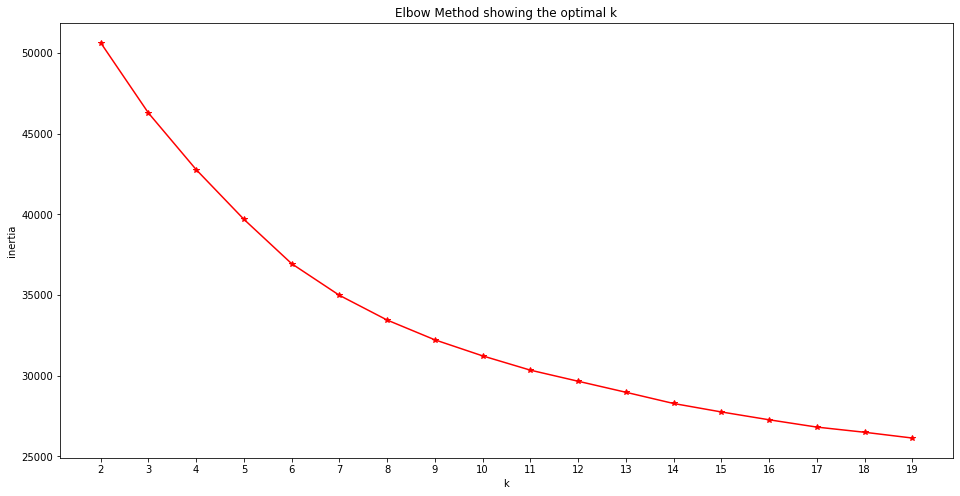

In [35]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'r*-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')   

In [36]:
kmeans.inertia_

26139.02147083313

In [37]:
kmeans_final = KMeans(n_clusters=5, random_state=1234)
kmeans_final.fit(X_prep)
clusters_final = kmeans_final.predict(X_prep)
pd.Series(clusters_final).value_counts().sort_index()

0     730
1     644
2    2000
3    1770
4     151
dtype: int64

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

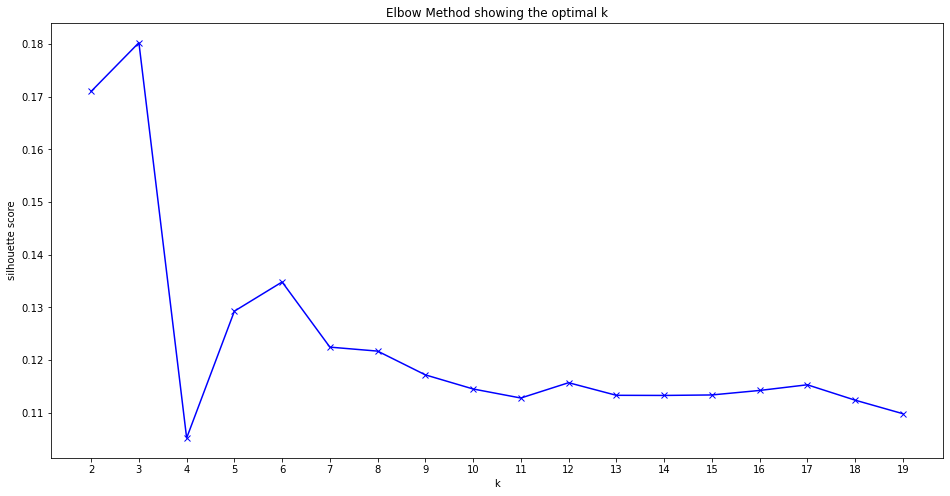

In [38]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

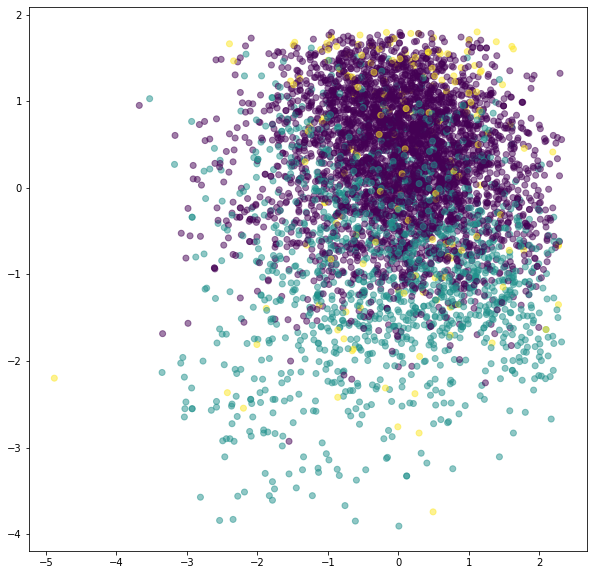

In [39]:
from sklearn import cluster, datasets
agglomerative = cluster.AgglomerativeClustering(n_clusters=3,linkage='ward')
pred = agglomerative.fit_predict(X_prep)
plt.figure(figsize=(10, 10))
plt.scatter(X_prep[:, 0], X_prep[:, 1], c=pred,alpha=0.5)
plt.show()

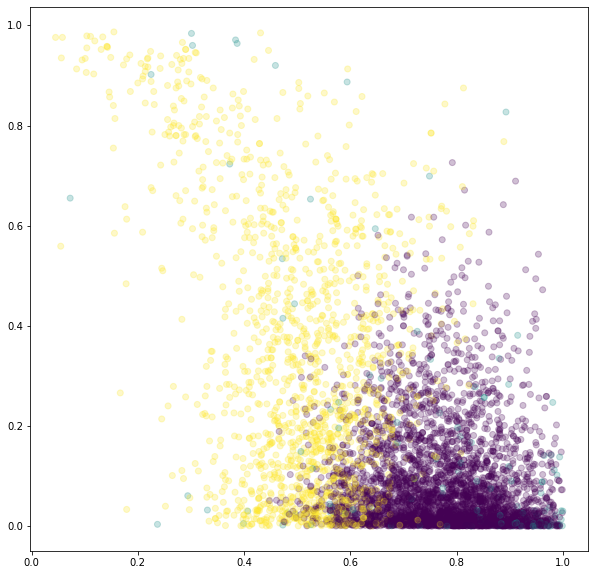

In [40]:
plt.figure(figsize=(10, 10))
plt.scatter(all_featuresdf['energy'], all_featuresdf['acousticness'], c=clusters,alpha=0.25)
plt.show()

In [41]:
all_tracks_final = pd.concat([all_artistsdf, all_track_namesdf, all_urisdf, all_featuresdf,pd.Series(clusters_final)],axis=1)


In [42]:
all_tracks_final = all_tracks_final.rename(columns={0:'clustered'})
all_tracks_final

,artist,name,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,clustered
0,Hozier,Take Me To Church,spotify:track:7dS5EaCoMnN7DzlpT6aRn2,0.566,0.664,4,-5.303,0,0.0464,0.63400,0.000000,0.116,0.437,128.945,0
1,Mike Posner,Cooler Than Me - Single Mix,spotify:track:2V4bv1fNWfTcyRJKmej6Sj,0.768,0.820,7,-4.630,0,0.0474,0.17900,0.000000,0.689,0.625,129.965,1
2,"Tyler, The Creator",See You Again (feat. Kali Uchis),spotify:track:7KA4W4McWYRpgf0fWsJZWB,0.558,0.559,6,-9.222,1,0.0959,0.37100,0.000007,0.109,0.620,78.558,0
3,Bastille,Pompeii,spotify:track:3gbBpTdY8lnQwqxNCcf795,0.679,0.715,9,-6.383,1,0.0407,0.07550,0.000000,0.271,0.571,127.435,2
4,Shakira,Hips Don't Lie (feat. Wyclef Jean),spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,0.778,0.824,10,-5.892,0,0.0707,0.28400,0.000000,0.405,0.758,100.024,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5290,MARINA,Hermit the Frog,spotify:track:4Zcz6saEkOII3PlXd9gN3o,0.609,0.679,0,-4.545,1,0.0312,0.24300,0.000000,0.199,0.487,122.034,2
5291,Olivia Rodrigo,deja vu,spotify:track:61KpQadow081I2AsbeLcsb,0.439,0.610,9,-7.236,1,0.1160,0.59300,0.000011,0.341,0.172,181.088,0
5292,BIA,WHOLE LOTTA MONEY,spotify:track:5yorXJWdBan1Vlh116ZtQ7,0.897,0.371,1,-5.019,1,0.3680,0.09040,0.000000,0.325,0.441,81.008,2
5293,Ashnikko,Slumber Party (feat. Princess Nokia),spotify:track:11ZulcYY4lowvcQm4oe3VJ,0.964,0.398,11,-8.981,0,0.0795,0.00151,0.000039,0.101,0.563,105.012,3


In [54]:
#all_tracks_final["song_artist"] = (all_tracks_final["name"] + " by " + all_tracks_final["artist"])
all_tracks_final

,artist,name,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,clustered
0,Hozier,Take Me To Church,spotify:track:7dS5EaCoMnN7DzlpT6aRn2,0.566,0.664,4,-5.303,0,0.0464,0.63400,0.000000,0.116,0.437,128.945,0
1,Mike Posner,Cooler Than Me - Single Mix,spotify:track:2V4bv1fNWfTcyRJKmej6Sj,0.768,0.820,7,-4.630,0,0.0474,0.17900,0.000000,0.689,0.625,129.965,1
2,"Tyler, The Creator",See You Again (feat. Kali Uchis),spotify:track:7KA4W4McWYRpgf0fWsJZWB,0.558,0.559,6,-9.222,1,0.0959,0.37100,0.000007,0.109,0.620,78.558,0
3,Bastille,Pompeii,spotify:track:3gbBpTdY8lnQwqxNCcf795,0.679,0.715,9,-6.383,1,0.0407,0.07550,0.000000,0.271,0.571,127.435,2
4,Shakira,Hips Don't Lie (feat. Wyclef Jean),spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,0.778,0.824,10,-5.892,0,0.0707,0.28400,0.000000,0.405,0.758,100.024,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5290,MARINA,Hermit the Frog,spotify:track:4Zcz6saEkOII3PlXd9gN3o,0.609,0.679,0,-4.545,1,0.0312,0.24300,0.000000,0.199,0.487,122.034,2
5291,Olivia Rodrigo,deja vu,spotify:track:61KpQadow081I2AsbeLcsb,0.439,0.610,9,-7.236,1,0.1160,0.59300,0.000011,0.341,0.172,181.088,0
5292,BIA,WHOLE LOTTA MONEY,spotify:track:5yorXJWdBan1Vlh116ZtQ7,0.897,0.371,1,-5.019,1,0.3680,0.09040,0.000000,0.325,0.441,81.008,2
5293,Ashnikko,Slumber Party (feat. Princess Nokia),spotify:track:11ZulcYY4lowvcQm4oe3VJ,0.964,0.398,11,-8.981,0,0.0795,0.00151,0.000039,0.101,0.563,105.012,3


In [44]:
all_tracks_final["clustered"].value_counts()

2    2000
3    1770
0     730
1     644
4     151
Name: clustered, dtype: int64

In [45]:
all_tracks_final.to_csv('playlist.csv',index=False)

In [46]:
import pickle
pickle.dump(kmeans, open('kmean.pkl', 'wb'))

In [47]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

# trying to make piplines

In [48]:
top100 = pd.read_csv('top100.csv')
top100["song_artist"] = top100["song"] + " by " + top100["artist"] 
top100

,artist,song,song_artist
0,elton john & dua lipa,cold heart (pnau remix),cold heart (pnau remix) by elton john & dua lipa
1,adele,easy on me,easy on me by adele
2,gino graus,schiddi widdi witt,schiddi widdi witt by gino graus
3,acraze,do it to it (feat. cherish),do it to it (feat. cherish) by acraze
4,jan biggel,ons moeder zeej nog,ons moeder zeej nog by jan biggel
...,...,...,...
95,instrumental legends,god is a woman (instrumental),god is a woman (instrumental) by instrumental ...
96,tom russell,across the border,across the border by tom russell
97,emily wells,antidote,antidote by emily wells
98,thomas mapfumo,nyoka musango,nyoka musango by thomas mapfumo


In [49]:
all_tracks_final.isnull().sum()/len(all_tracks_final)

artist              0.0
name                0.0
uri                 0.0
danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
clustered           0.0
song_artist         0.0
dtype: float64

In [50]:
#all_tracks_final = all_tracks_final.drop(['song_artist'],axis=1)

### Final prototype

In [51]:
#t_song["tracks"]["items"][0]["id"]

In [52]:
def features(artist, track):
    t_song = sp.search(q='artist:' + artist + ' track:' + track, type='track')
    uri = t_song["tracks"]["items"][0]["id"]
    features = sp.audio_features(uri)
    return features

In [58]:
import random

song_name = input("Please Enter the song title: ").lower()
artist_name = input("Please Enter the artist title: ").lower()
spotipy = sp.search(q=song_name, type='track')
typo = spotipy["tracks"]["total"] 

while typo == 0:
    print("Song does not exist")
    song_name = input("Enter song: ").lower()
    artist_name = input("Enter artist: ").lower()
    spotipy = sp.search(q=song_name, type='track')
    typo = spotipy["tracks"]["total"]

if song_name in list(top100['song']):
    print("Tekin suggests: " + random.choice(top100['song_artist']))
    
else:
    feature = features(artist_name,song_name)
    column = list(feature[0].keys())
    column_val = [list(feature[0].values())]
    features_df = pd.DataFrame(data=column_val, columns = column)
    features_df = features_df.drop(['type','id','uri','track_href','analysis_url','duration_ms','time_signature'],axis=1)
    scale_df = scaler.transform(features_df)
    cluster = kmeans_final.predict(scale_df)
    clustered_n = all_tracks_final[all_tracks_final["clustered"] == cluster[0]] 
    recommend = random.choice(clustered_n["name"])
    print('Tekin recommends ',recommend)

Please Enter the song title: laps around the sun
Please Enter the artist title: ziggy alberts
Tekin recommends  Just Can’t Get Enough


In [ ]:
#all_tracks_final["name"] = all_tracks_final["name"] + " by " + all_tracks_final["artist"] 